In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
telecom=pd.read_csv("training_data.csv")
telecom.head()

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,Los Angeles,Male,No,2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
1,Los Angeles,Female,No,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
2,Los Angeles,Female,No,8,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
3,Los Angeles,Female,No,28,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
4,Los Angeles,Male,No,49,Yes,Fiber optic,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes


In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Senior_Citizen    7043 non-null   object 
 3   Tenure_Months     7043 non-null   int64  
 4   Phone_Service     7043 non-null   object 
 5   Internet_Service  7043 non-null   object 
 6   Streaming TV      7043 non-null   object 
 7   Streaming Movies  7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   Payment Method    7043 non-null   object 
 10  Monthly Charges   7043 non-null   float64
 11  Total_Charges     7043 non-null   object 
 12  Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 715.4+ KB


In [5]:
telecom.isnull().sum()

City                0
Gender              0
Senior_Citizen      0
Tenure_Months       0
Phone_Service       0
Internet_Service    0
Streaming TV        0
Streaming Movies    0
Contract            0
Payment Method      0
Monthly Charges     0
Total_Charges       0
Churn               0
dtype: int64

<AxesSubplot:>

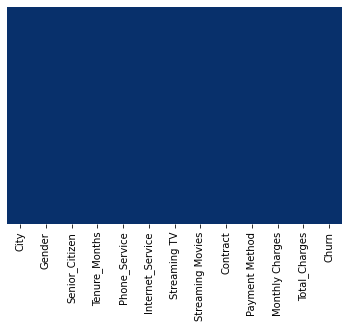

In [6]:
sns.heatmap(telecom.isnull(),yticklabels=False,cbar=False,cmap="Blues_r")

the figure above indicates that there is no any missing values in the data set

In [7]:
telecom['Total_Charges'] = pd.to_numeric(telecom['Total_Charges'],errors='coerce')

In [8]:
nan_cols = [i for i in telecom.columns if telecom[i].isnull().any()]
nan_cols

['Total_Charges']

Although there are no missing values some values had the space in it as a value. hence when changing the format of the data is produces NAN values

In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Senior_Citizen    7043 non-null   object 
 3   Tenure_Months     7043 non-null   int64  
 4   Phone_Service     7043 non-null   object 
 5   Internet_Service  7043 non-null   object 
 6   Streaming TV      7043 non-null   object 
 7   Streaming Movies  7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   Payment Method    7043 non-null   object 
 10  Monthly Charges   7043 non-null   float64
 11  Total_Charges     7032 non-null   float64
 12  Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 715.4+ KB


In [10]:
telecom.shape

(7043, 13)

is there duplicate data in the datasets

In [12]:
duplicateRows = telecom[telecom.duplicated()]
duplicateRows

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn


this indicates there is no any duplicate data

checking for the categorical variable in the data sets

In [13]:
def cat_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [14]:
cat_unique_col_values(telecom)# this is used to find the unique values in the data sets

City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Gender: ['Male' 'Female']
Senior_Citizen: ['No' 'Yes']
Phone_Service: ['Yes' 'No']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['Yes' 'No']


here we see that streaming video and streaming tv has no internet service in case of no so simply removing the with simple NO

In [15]:
telecom.replace("No internet service","No",inplace=True)


In [16]:
cat_unique_col_values(telecom)

City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Gender: ['Male' 'Female']
Senior_Citizen: ['No' 'Yes']
Phone_Service: ['Yes' 'No']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['No' 'Yes']
Contract: ['Month-to-month' 'Two year' 'One year']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['Yes' 'No']


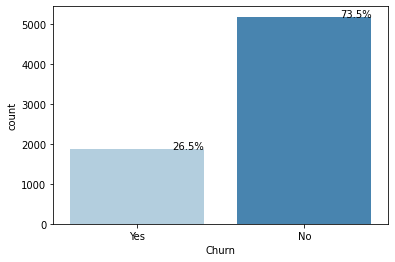

In [17]:
ax = sns.countplot(x="Churn", data=telecom, palette="Blues")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

pie chart showing the percentage of senior citizen

In [18]:
import matplotlib.ticker as mtick  #for shpwing in pie chart form

Text(0.5, 1.0, 'percentage of Senior_Citizens')

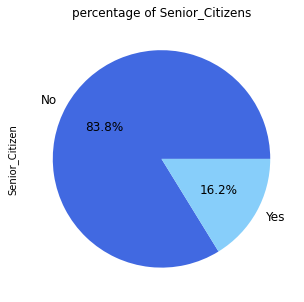

In [19]:
ax = (telecom['Senior_Citizen'].value_counts()*100.0 /len(telecom)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of Senior_Citizens', fontsize = 12)

pie chart showing the gender of customer

Text(0.5, 1.0, 'percentage of gender')

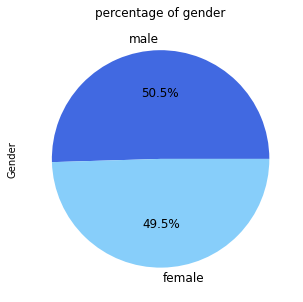

In [20]:
ax = (telecom['Gender'].value_counts()*100.0 /len(telecom)).plot.pie(autopct='%.1f%%', labels = ['male', 'female'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of gender', fontsize = 12)

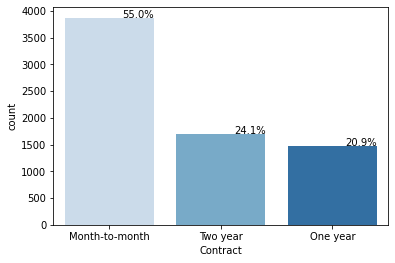

In [21]:
ax = sns.countplot(x="Contract", data=telecom, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')
plt.show()

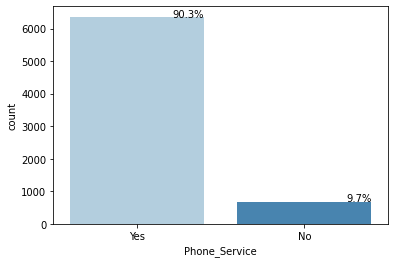

In [22]:
ax = sns.countplot(x="Phone_Service", data=telecom, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')
plt.show()

The services provided by the company

In [23]:
Services=['Tenure_Months','phone_Service','Internet_Service,Streaming TV','Streaming Movies','Payment Method','Monthly Charges']

In [24]:
 fig, axes= plt.subplot(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(Services):
  if i < 3:
    ax = sns.countplot(x=telecom[Services], data=telecom, palette="Blues",ax=axes[i,0])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')        
  elif i >=3 and i < 6:
    ax = sns.countplot(x=telecom[Services], data=telecom, palette="Blues",ax=axes[i-3,1])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right') 
  elif i < 9:
    ax = sns.countplot(x=telecom[Services], data=telecom, palette="Blues",ax=axes[i-6,2])    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right') 



SyntaxError: invalid syntax (3883476517.py, line 18)

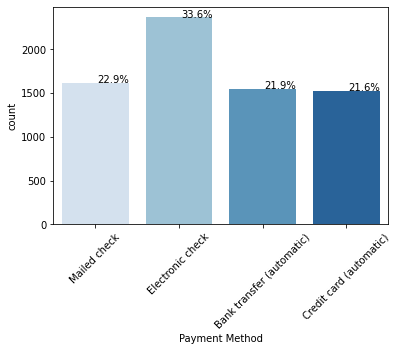

In [25]:
ax = sns.countplot(x="Payment Method", data=telecom, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right') 

Finding for the tenure of the company tenure is the number of months the customer has stayed with the company

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'no of Customers by their tenure')

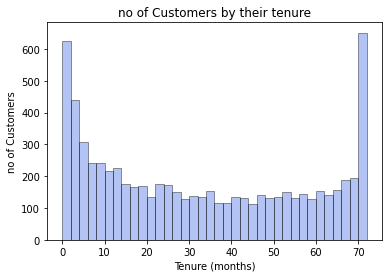

In [26]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
ax = sns.distplot(telecom['Tenure_Months'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('no of Customers by their tenure')

After looking at the above histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the company.

Text(0.5, 1.0, 'Two Year Contract')

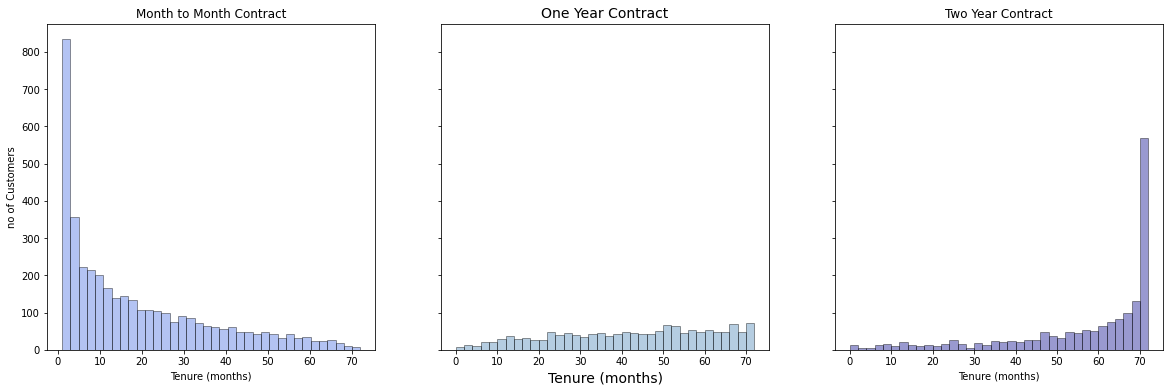

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom[telecom['Contract']=='Month-to-month']['Tenure_Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'royalblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')
ax = sns.distplot(telecom[telecom['Contract']=='One year']['Tenure_Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom[telecom['Contract']=='Two year']['Tenure_Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

from this, we can clearly see that month to month contract customers have low tenure and two year contract customrs have high tenure of around 70 months. So highest probability to churn customers are in month to month contract type.

<AxesSubplot:xlabel='Monthly Charges', ylabel='Count'>

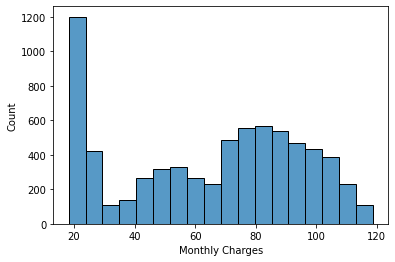

In [28]:
sns.histplot(data=telecom, x="Monthly Charges")

most of the customers have low monthly charges which cause for low total charges.

<AxesSubplot:xlabel='Total_Charges'>

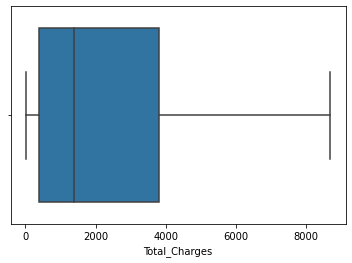

In [29]:
sns.boxplot(x=telecom['Total_Charges'])

<AxesSubplot:xlabel='Monthly Charges'>

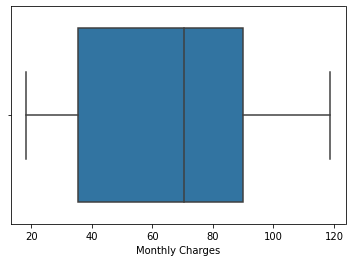

In [30]:
sns.boxplot(x=telecom['Monthly Charges'])

<AxesSubplot:xlabel='Tenure_Months'>

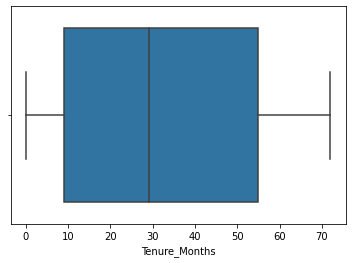

In [31]:
sns.boxplot(x=telecom['Tenure_Months'])

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total_Charges'>

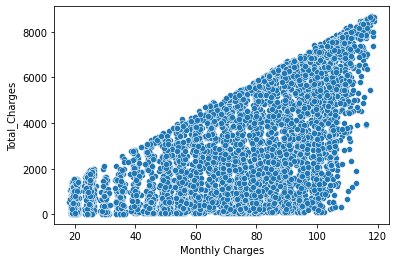

In [32]:
sns.scatterplot(data=telecom, x="Monthly Charges", y="Total_Charges")

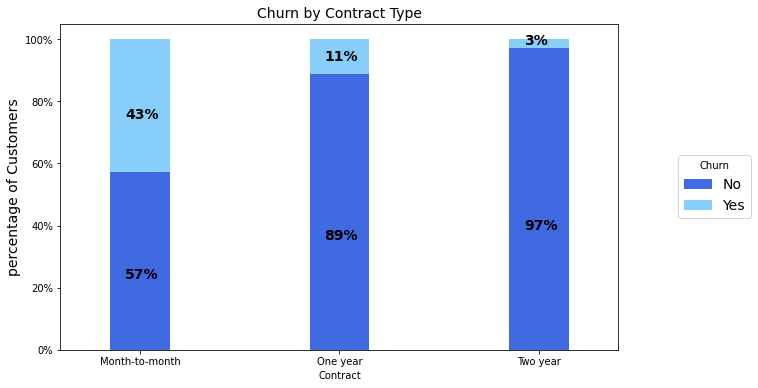

In [33]:
colors = ['royalblue','lightskyblue']
contract_churn = telecom.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center right',prop={'size':14},title = 'Churn', bbox_to_anchor=(1.25, 0.5))
ax.set_ylabel('percentage of Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

#to labels on the bar we have following code
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size = 14)

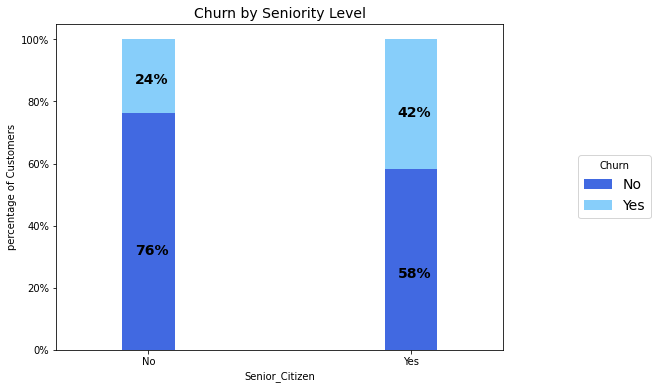

In [34]:
seniority_churn = telecom.groupby(['Senior_Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0,  figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn',bbox_to_anchor=(1.25, 0.5))
ax.set_ylabel('percentage of Customers')
ax.set_title('Churn by Seniority Level',size = 14)
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size =14)


42% of senior citizens have churned while only 24% of non senior citizens have churned.

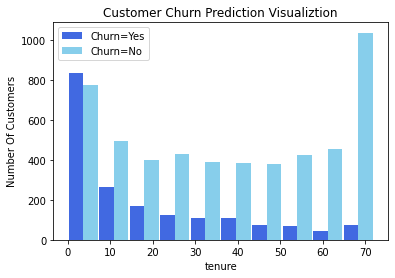

In [35]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
tenure_churn_no = telecom[telecom.Churn=='No'].Tenure_Months
tenure_churn_yes = telecom[telecom.Churn=='Yes'].Tenure_Months

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['royalblue','skyblue'],label=['Churn=Yes','Churn=No'])
plt.legend()

Text(0.5, 1.0, 'Distribution of total charges by churn')

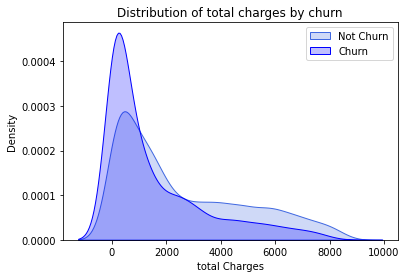

In [36]:
ax = sns.kdeplot(telecom.Total_Charges[(telecom["Churn"] == 'No') ], color="royalblue", shade = True)
ax = sns.kdeplot(telecom.Total_Charges[(telecom["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('total Charges')
ax.set_title('Distribution of total charges by churn')

In [37]:
telecom.shape

(7043, 13)

In [38]:
categorical_cols= telecom.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')

The dataset contains 10 categorical columns


In [39]:
categorical_cols.describe()

,City,Gender,Senior_Citizen,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,1129,2,2,2,3,2,2,3,4,2
top,Los Angeles,Male,No,Yes,Fiber optic,No,No,Month-to-month,Electronic check,No
freq,305,3555,5901,6361,3096,4336,4311,3875,2365,5174


In [40]:
for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

City : 1129 labels
Gender : 2 labels
Senior_Citizen : 2 labels
Phone_Service : 2 labels
Internet_Service : 3 labels
Streaming TV : 2 labels
Streaming Movies : 2 labels
Contract : 3 labels
Payment Method : 4 labels
Churn : 2 labels


# CORRELEATION AMONG VARIABLE

Dython library is very good for finding the correlation aming the variable

In [41]:
#to install dython
!pip install dython

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.1 which is incompatible.


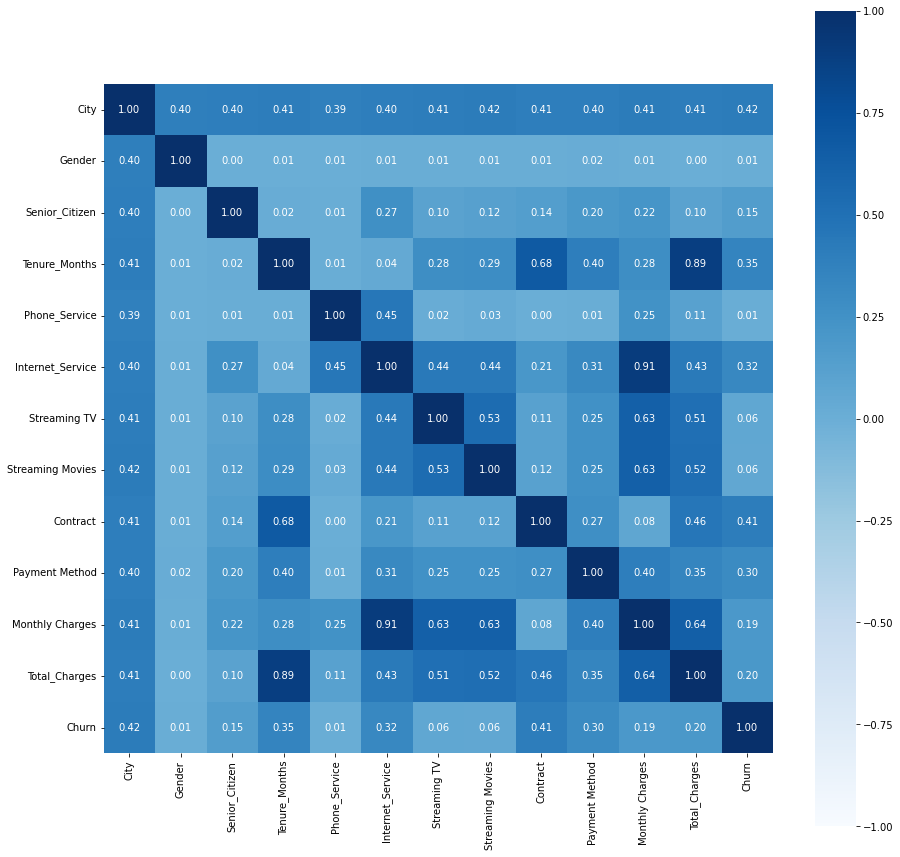

{'corr':                       City    Gender  Senior_Citizen  Tenure_Months  \
 City              1.000000  0.396718        0.402222       0.408625   
 Gender            0.396718  1.000000        0.001488       0.005106   
 Senior_Citizen    0.402222  0.001488        1.000000       0.016567   
 Tenure_Months     0.408625  0.005106        0.016567       1.000000   
 Phone_Service     0.390041  0.006008        0.007925       0.008448   
 Internet_Service  0.403540  0.011320        0.265324       0.039100   
 Streaming TV      0.412455  0.008101        0.104982       0.279756   
 Streaming Movies  0.419859  0.010196        0.119781       0.286111   
 Contract          0.405758  0.008153        0.143868       0.675863   
 Payment Method    0.398466  0.018646        0.195985       0.399829   
 Monthly Charges   0.414336  0.014569        0.220173       0.276417   
 Total_Charges     0.411020  0.000080        0.103006       0.889696   
 Churn             0.418507  0.008291        0.150453   

In [43]:
from dython.nominal import associations
associations(telecom,numerical_columns=['Tenure_Months','Monthly Charges','Total_Charges'] ,nom_nom_assoc='cramer',num_num_assoc='spearman',cramers_v_bias_correction=False,
             hide_columns='customerID',hide_rows='customerID',figsize=(15, 15),cmap="Blues")


The correlation values between numerical and numerical variables were calculated using spearman correlation (since the numerical variables violate assumptions of pearson correlation). The values for numerical and categorical variables were calculated using cramers v method. The values for categorical and categorical variables were calculated using correlation ratio method. According to the correlaion values here we can see that there is multicollinearity. Since in this problem the coefficients are not interpreted and the main goal is to built an classifier with high prediction power those are neglected. As a pre processing part some cateogries in service related variabels were changed and that causes from reducing correlation between those service related variables.